In [1]:
from google.colab import drive
drive.mount('/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /gdrive


In [84]:
pip install -U scikit-learn

     |████████████████████████████████| 6.9MB 2.8MB/s 
  Found existing installation: scikit-learn 0.22.2.post1
    Uninstalling scikit-learn-0.22.2.post1:
      Successfully uninstalled scikit-learn-0.22.2.post1


In [10]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [13]:
import os
os.chdir("/content/drive/My Drive/Analytic-Steps-blogs/YouTube/Sentiment/fourth_blog/")

In [1]:


import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import scipy


import warnings
warnings.filterwarnings("ignore")


In [2]:
from textblob import TextBlob
from sklearn import metrics
from mlxtend.plotting import plot_confusion_matrix

In [12]:
ls

drive/  sample_data/


In [14]:
data = pd.read_csv("Dataset (1).csv")

In [15]:
data.head()

,Video ID,Comment ID,comments
0,nYh-n7EOtMA,UgjXwK1t2StW63gCoAEC,There are 3 type of English 1 U...
1,nYh-n7EOtMA,UgxUOrU7YocYI9aar9h4AaABAg,There are 3 types of English 1 Am...
2,nYh-n7EOtMA,UgxA-OfWaFFXYL5-PrB4AaABAg,The face of the girl at the beginning ...
3,nYh-n7EOtMA,UgzAMEhYy36fTajZ4tN4AaABAg,Even the lyrics aren't even sure what S...
4,nYh-n7EOtMA,UgwvVJ-OkFhfudsjLb14AaABAg,Song I don't need no money Me S...


In [16]:
data.shape

(3161, 3)

In [17]:
data['polarity'] = data['comments'].apply(lambda x: TextBlob(x).sentiment.polarity)

In [18]:
data.head()

,Video ID,Comment ID,comments,polarity
0,nYh-n7EOtMA,UgjXwK1t2StW63gCoAEC,There are 3 type of English 1 U...,0.0
1,nYh-n7EOtMA,UgxUOrU7YocYI9aar9h4AaABAg,There are 3 types of English 1 Am...,0.0
2,nYh-n7EOtMA,UgxA-OfWaFFXYL5-PrB4AaABAg,The face of the girl at the beginning ...,0.0
3,nYh-n7EOtMA,UgzAMEhYy36fTajZ4tN4AaABAg,Even the lyrics aren't even sure what S...,0.5
4,nYh-n7EOtMA,UgwvVJ-OkFhfudsjLb14AaABAg,Song I don't need no money Me S...,0.0


## Shuffle the dataset

In [19]:
data = data.sample(frac=1).reset_index(drop=True)

In [20]:
data['pol_cat']  = 0

Continuous to categorical

In [21]:
# data['pol_cat'][data.polarity == 0] = 0
data['pol_cat'][data.polarity > 0] = 1
data['pol_cat'][data.polarity <= 0] = -1


In [22]:
data.head()

,Video ID,Comment ID,comments,polarity,pol_cat
0,nYh-n7EOtMA,Ugzab-Wshj4zrQwDE9V4AaABAg,This song will never get old,0.10,1
1,nYh-n7EOtMA,Ugxljrq5dGYKBMgx5DF4AaABAg,Year 2020 And we are here,0.00,-1
2,6mqbAnrtWHo,Ugw8ugUlJMXPsYjYYAV4AaABAg,t is nice song I love Sia,0.55,1
3,nYh-n7EOtMA,UgwHqVWZumMQKnRYZfx4AaABAg,U must have or definitely need english ...,0.00,-1
4,nYh-n7EOtMA,UgxJHlpGl2nlEd_2bvd4AaABAg,I don t want to know how much times s...,-0.15,-1


In [23]:
data['pol_cat'].value_counts()

 1    1722
-1    1439
Name: pol_cat, dtype: int64

Create separate dataframes for Negative,Positive & Neutral comments 

In [24]:
data_pos = data[data['pol_cat'] == 1]
data_pos = data_pos.reset_index(drop = True)

data_neg = data[data['pol_cat'] == -1]
data_neg = data_neg.reset_index(drop = True)

# data_neutral = data[data['pol_cat'] == 0]
# data_neutral = data_neutral.reset_index(drop = True)

In [25]:
data_pos.head()

,Video ID,Comment ID,comments,polarity,pol_cat
0,nYh-n7EOtMA,Ugzab-Wshj4zrQwDE9V4AaABAg,This song will never get old,0.10,1
1,6mqbAnrtWHo,Ugw8ugUlJMXPsYjYYAV4AaABAg,t is nice song I love Sia,0.55,1
2,6mqbAnrtWHo,Ugxp0bMfufcK5pA0oYB4AaABAg,I love this song,0.50,1
3,nYh-n7EOtMA,UgzBpbYsfNwlpj91s914AaABAg,i loved the part where the director sees,0.70,1
4,31crA53Dgu0,UgjrdLS8CMzcFngCoAEC,Sia is so brilliant,0.90,1


In [26]:
data_pos.shape

(1722, 5)

In [27]:
data_neg.head()

,Video ID,Comment ID,comments,polarity,pol_cat
0,nYh-n7EOtMA,Ugxljrq5dGYKBMgx5DF4AaABAg,Year 2020 And we are here,0.00,-1
1,nYh-n7EOtMA,UgwHqVWZumMQKnRYZfx4AaABAg,U must have or definitely need english ...,0.00,-1
2,nYh-n7EOtMA,UgxJHlpGl2nlEd_2bvd4AaABAg,I don t want to know how much times s...,-0.15,-1
3,nYh-n7EOtMA,UghcISiUaTCexHgCoAEC,I AM SORRY BABY I NEED DOLAR B LLS TO...,-0.10,-1
4,nYh-n7EOtMA,UgxTu5tMFRyLEilhzkp4AaABAg,This is how aliens came to earth and t...,0.00,-1


In [28]:
data_neg['comments'][40]

"NO  ONE  CARES  WHAT  TIME  YOU'RE  HERE"

 1    1722
-1    1439
Name: pol_cat, dtype: int64

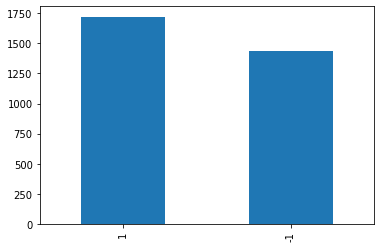

In [29]:
data.pol_cat.value_counts().plot.bar()
data.pol_cat.value_counts()

## Data Preprocessing

Lower the text in comments

In [30]:
data['comments'] = data['comments'].str.lower()

In [31]:
data['comments'].head()

0                  this  song  will  never  get  old  
1                   year    2020  and  we  are  here  
2                t  is  nice  song        i  love  sia
3    u  must  have  or  definitely  need  english  ...
4    i  don  t  want  to  know  how  much  times  s...
Name: comments, dtype: object

In [32]:
data.describe()

,polarity,pol_cat
count,3161.000000,3161.000000
mean,0.230283,0.089529
std,0.311702,0.996142
min,-1.000000,-1.000000
25%,0.000000,-1.000000
50%,0.156250,1.000000
75%,0.500000,1.000000
max,1.000000,1.000000


In [33]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3161 entries, 0 to 3160
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Video ID    3161 non-null   object 
 1   Comment ID  3161 non-null   object 
 2   comments    3161 non-null   object 
 3   polarity    3161 non-null   float64
 4   pol_cat     3161 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 123.6+ KB


In [34]:
data['comments'][0]

'this  song  will  never  get  old  '

In [35]:
data['comments'][0].strip()

'this  song  will  never  get  old'

In [36]:
import nltk
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [37]:
nltk.download("punkt")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [38]:
from nltk.corpus import stopwords
from nltk import word_tokenize
import string
import re
import nltk

In [42]:
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [43]:
stop_words = set(stopwords.words('english'))

In [44]:
data['comments'] = data['comments'].str.strip()

In [45]:
train = data.copy()

In [46]:
train['comments'] = train['comments'].str.strip()

In [47]:
train['comments'][0]

'this  song  will  never  get  old'

In [48]:
def remove_stopwords(line):
    word_tokens = word_tokenize(line)
    filtered_sentence = [w for w in word_tokens if not w in stop_words]
    return " ".join(filtered_sentence)

In [49]:
data['stop_comments'] = data['comments'].apply(lambda x : remove_stopwords(x))

In [50]:
data.head()

,Video ID,Comment ID,comments,polarity,pol_cat,stop_comments
0,nYh-n7EOtMA,Ugzab-Wshj4zrQwDE9V4AaABAg,this song will never get old,0.10,1,song never get old
1,nYh-n7EOtMA,Ugxljrq5dGYKBMgx5DF4AaABAg,year 2020 and we are here,0.00,-1,year 2020
2,6mqbAnrtWHo,Ugw8ugUlJMXPsYjYYAV4AaABAg,t is nice song i love sia,0.55,1,nice song love sia
3,nYh-n7EOtMA,UgwHqVWZumMQKnRYZfx4AaABAg,u must have or definitely need english ...,0.00,-1,u must definitely need english subtitles sean ...
4,nYh-n7EOtMA,UgxJHlpGl2nlEd_2bvd4AaABAg,i don t want to know how much times s...,-0.15,-1,want know much times someone failed got hurt m...


In [51]:
from sklearn.model_selection import train_test_split

In [52]:
X_train,X_test,y_train,y_test = train_test_split(data['stop_comments'],data['pol_cat'],test_size = 0.2,random_state = 324)

In [53]:
X_train.shape

(2528,)

In [54]:
X_test.shape

(633,)

In [55]:
data['pol_cat'].value_counts()

 1    1722
-1    1439
Name: pol_cat, dtype: int64

## Gonna Apply Logistic Regression

In [56]:
from sklearn.feature_extraction.text import CountVectorizer

In [57]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer 
vect = CountVectorizer()
tf_train = vect.fit_transform(X_train)
tf_test = vect.transform(X_test)

In [58]:
tf_train.shape

(2528, 3278)

### Print the Vocabulary

In [59]:
print(vect.vocabulary_)

{'like': 1696, 'lenguaghe': 1674, 'english': 1008, 'nude': 2050, 'color': 671, 'skin': 2621, 'leotard': 1677, 'available': 326, 'outfit': 2118, 'cool': 717, 'didnt': 868, 'nutcracker': 2054, 'guys': 1325, 'tights': 2921, 'fine': 1144, 'dont': 908, 'since': 2597, 'song': 2669, 'badass': 348, 'harley': 1357, 'quinn': 2324, 'japanese': 1548, 'babes': 340, 'snd': 2651, 'chic': 610, 'thanks': 2865, 'good': 1281, 'youre': 3263, 'sorta': 2682, 'thing': 2880, 'threwup': 2901, 'little': 1721, 'jk': 1556, 'bye': 516, 'tobwohtuiudiowkgdoue9cgdtc': 2941, 'types': 3011, 'lot': 1749, 'come': 676, 'turn': 2997, 'radio': 2334, 'friday': 1200, 'night': 2017, 'wo': 3186, 'long': 1739, 'got': 1288, 'ta': 2809, 'hair': 1342, 'put': 2308, 'make': 1809, 'till': 2927, 'hit': 1410, 'dance': 802, 'floor': 1160, 'need': 1998, 'ai': 218, 'cash': 557, 'baby': 341, 'dollar': 905, 'bills': 424, 'fun': 1211, 'tonight': 2951, 'love': 1753, 'cheap': 594, 'thrills': 2905, 'money': 1929, 'feel': 1121, 'beat': 378, 'keep

In [60]:
vocab = vect.vocabulary_

In [61]:
# for key,value in vocab.items():
#     if(value == 162):
#         print(key)

import the logistic regression classifer and fit on the training dataset

In [62]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(tf_train,y_train)

LogisticRegression()

###  Accuracy score on training dataset

In [63]:
lr.score(tf_train,y_train)

0.9790348101265823

### Accuracy score on test dataset i.e got from the splitting

In [64]:
lr.score(tf_test,y_test)

0.9225908372827805

### Make predictions on the test dataset i.e. unseen data to the model

In [65]:
expected = y_test
predicted = lr.predict(tf_test)

### plot confusion matrix for the test dataset

In [70]:

from mlxtend.plotting import plot_confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

In [71]:
pip install mlxtend

[[320  41]
 [  8 264]]


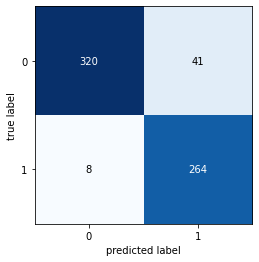

In [75]:
cf = metrics.confusion_matrix(expected,predicted,labels = [1,-1])
print(cf)
## this command is only for google collab 
## in the below figure " 1 is actually showing -1 and 0 is actually showing 1"
fig, ax = plot_confusion_matrix(conf_mat = cf)
                                
## It canbe used in any platform
# fig, ax = plot_confusion_matrix(conf_mat = cf, class_names = [1,-1])
plt.show()

In [79]:
from sklearn import metrics
print(metrics.classification_report(expected, predicted))
# print(metrics.confusion_matrix(expected,predicted))

              precision    recall  f1-score   support

          -1       0.86      0.98      0.92       281
           1       0.98      0.87      0.92       352

    accuracy                           0.92       633
   macro avg       0.92      0.93      0.92       633
weighted avg       0.93      0.92      0.92       633



### find the F1 score

In [80]:
from sklearn.metrics import f1_score
f1_score(expected, predicted, average='macro')

0.9192248508125556